In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
import pandas_profiling as pp
%matplotlib inline
sns.set_theme(style="darkgrid")
import feature_engine.encoding as enc
import statsmodels.api as sm

In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
X=df.drop('left',axis=1)
Y=df['left']

In [6]:
# converting work_accident and promotion_last_5years into categorical as they only have two values.

### Categorising the features on the bases of column data type

# 1) Categorical variables

In [7]:
# categorical variable
categorical=[var for var in X.columns if X[var].dtype == 'O']
print("The categorical columns are {}".format(categorical))

The categorical columns are ['Department', 'salary']


# 2) Continous variables

In [8]:
continous=[var for var in X.columns if X[var].dtype!='O']
print("The continous columns are {}".format(continous))

The continous columns are ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


### a) Numerical Variables

In [9]:
numerical=[var for var in continous if X[var].value_counts().count() > 10]
print("The numerical columns are {}".format(numerical))

The numerical columns are ['satisfaction_level', 'last_evaluation', 'average_montly_hours']


### b) Discrete Variables

In [10]:
discrete=[var for var in continous if X[var].value_counts().count() < 10 and var not in numerical ]
print("The discrete columns are {}".format(discrete))

The discrete columns are ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


# EDA

In [11]:
#Plot function will plot the bar plot with respect to the hue.On Y axis will be the percetage of categories of column on X aixis.
# Plot function will take 3 arguemnt, Dataframe , Feature will who's bar plot to be plotted, hue
def plot(dataframe,X,hue):
    temp=pd.DataFrame()
    
    if type(X)==list:
        for var in X:
            for i in dataframe[hue].unique():
                temp[i]=dataframe[var].loc[dataframe[hue]==i].value_counts()/dataframe.shape[0]*100
            temp.plot.bar()
            plt.xlabel(var)
            plt.ylabel("percenatge")
            
            plt.legend().set_title(hue)
            plt.show()
            temp=pd.DataFrame()
    elif type(X)==str:
        for i in dataframe[hue].unique():
            temp[i]=dataframe[X].loc[dataframe[hue]==i].value_counts()/dataframe.shape[0]*100
    
        temp.plot.bar()
        plt.xlabel(X)
        plt.ylabel("percenatge")
        plt.legend().set_title(hue)
    
    

# For Discrete Features

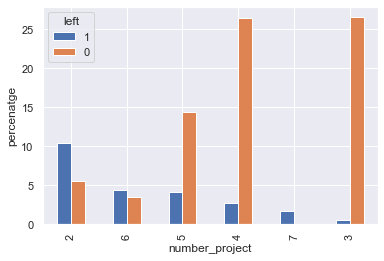

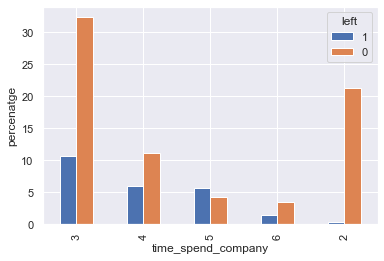

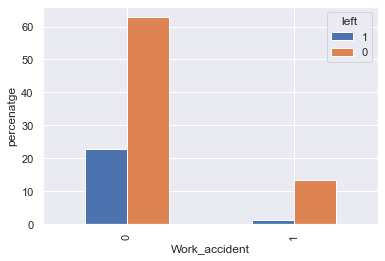

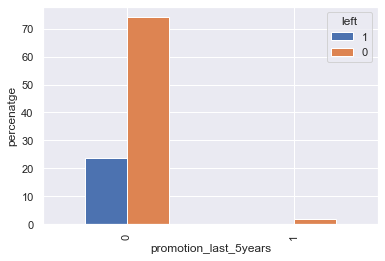

In [12]:

plot(df,discrete,'left')


# Take Away
 In number_of_project column we can observe for 2 , 6,7 the churn is more and 5 , 4 , 3 have more than 75% of the data.
 Time_spend_company - with 3,4,5 we have 20% of churn.For 5 we have more churn than employee who are still in the compnay.
 """Work_accident"""- For value 0 there is high amount of churn. with value 1 the amout churn is very less.
 promotion_last_5years- Its a imbalance column with with value 0 which has more than 95% of the data.
                           For value 0 there is high amount of churn.

# For Categorical Features 

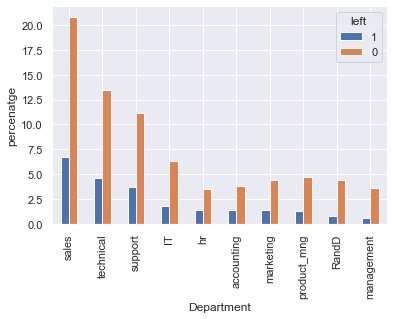

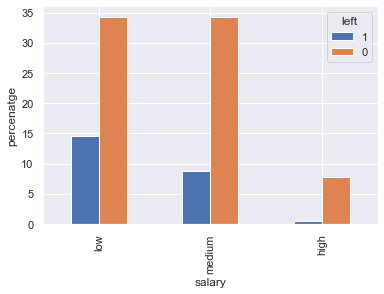

In [13]:
plot(df,categorical,'left')

# Take Away
With respect to Deparment feature we can see that for sales technical support churn is high and the data is more than 50%.
With respect to salary feature we can see that employee with low salary churn is high.

# For Numerical Features

In [14]:
df['satisfaction_level'].loc[df['left']==1].value_counts(sort=True)

0.10    358
0.11    335
0.09    195
0.37    194
0.43    178
       ... 
0.65      1
0.68      1
0.67      1
0.22      1
0.26      1
Name: satisfaction_level, Length: 81, dtype: int64

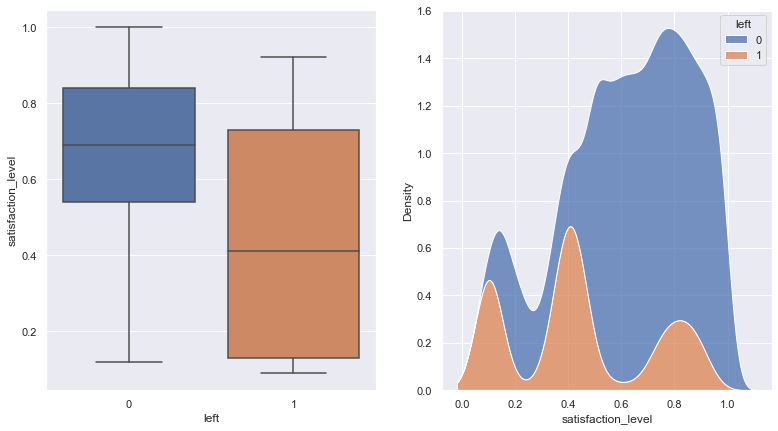

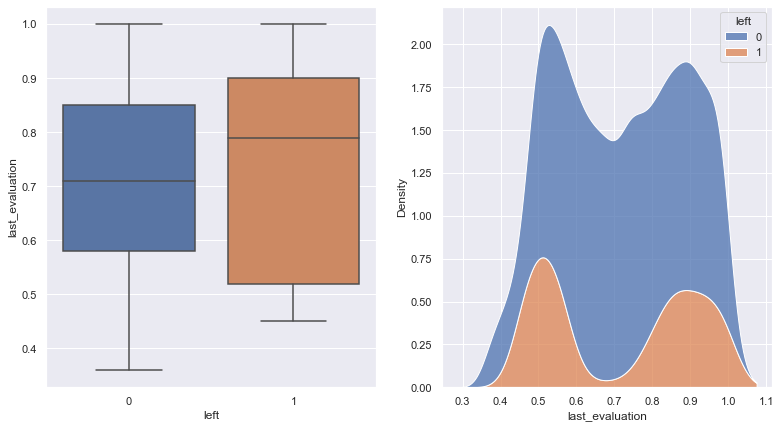

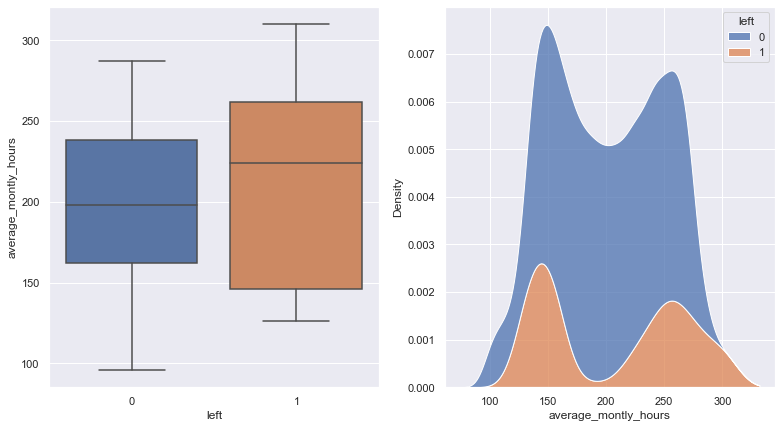

In [15]:
for var in numerical:   
    f, axs = plt.subplots(1, 2, figsize=(13,7))
    sns.boxplot(x='left',y=var,data=df,ax=axs[0])
    sns.kdeplot(x=var,hue='left',data=df,ax=axs[1],multiple='stack')
    
    

# Take Away
Statisfaction_level - we can observe that employee who left the statisfaction level mean is less.
                      Most employee have satisfaction level between 0.6 to .8.

last_evaluation -churn is more for employee having high last_evaluation.

averge_monthly_hours- churn is more for employee having high average monthly hours.

<AxesSubplot:>

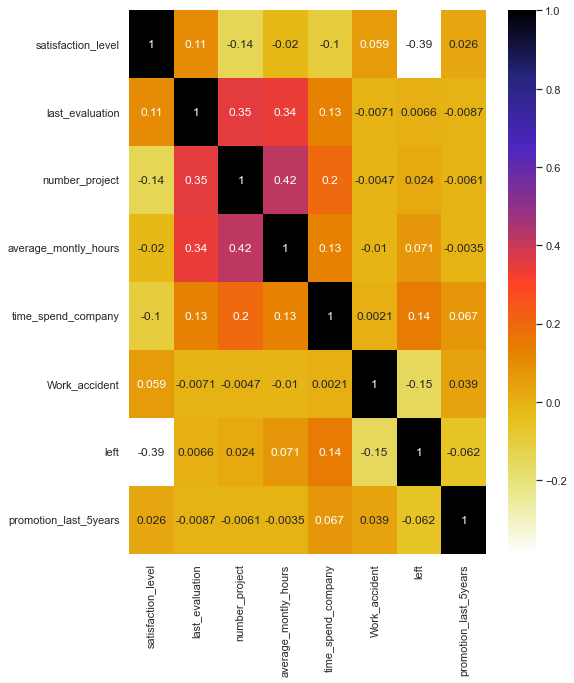

In [16]:
plt.figure(figsize=(8,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

<AxesSubplot:xlabel='left', ylabel='count'>

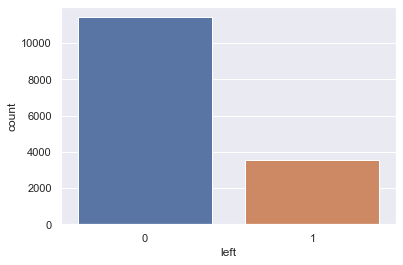

In [17]:
sns.countplot(x='left',data=df)

# Feature Engneering 

In [18]:
# checking null values
df.isnull().sum()
# we don't have any null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Splliting Data into Train And test

In [19]:
X[discrete]=X[discrete].astype('O')


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=2)

In [21]:
X_test

satisfaction_level  last_evaluation number_project  \
7231                 0.98             0.97              3   
12081                0.38             0.49              2   
5364                 0.54             0.72              5   
14589                0.31             0.56              4   
2353                 0.89             0.83              3   
...                   ...              ...            ...   
2886                 0.97             0.70              3   
7961                 0.90             0.62              5   
3069                 0.98             0.57              3   
14077                0.67             0.97              4   
1154                 0.39             0.53              2   

       average_montly_hours time_spend_company Work_accident  \
7231                    209                  3             0   
12081                   151                  3             0   
5364                    206                  4             0   
14589                   238                  2             0   
2353                    164                  3             0   
...                     ...                ...           ...   
2886                    203                  3             0   
7961                    225                  2             0   
3069                    198                  3             0   
14077                   196                  3             0   
1154                    131                  3             0   

      promotion_last_5years  Department  salary  
7231                      0     support     low  
12081                     0   technical     low  
5364                      0       sales    high  
14589                     0  accounting  medium  
2353                      0          IT     low  
...                     ...         ...     ...  
2886                      0          IT     low  
7961                      0       sales  medium  
3069                      0       sales  medium  
14077                     0     support  medium  
1154                      0       sales  medium  

[3000 rows x 9 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [25]:
# Encoding the categorical variables

Mean_encoding=enc.MeanEncoder(variables=categorical + discrete)
X_train=Mean_encoding.fit_transform(X_train,Y_train)
X_test=Mean_encoding.transform(X_test)

In [28]:
X_train

satisfaction_level  last_evaluation  number_project  \
8135                 0.53             0.78        0.222073   
11050                0.72             0.54        0.092917   
13658                0.52             0.52        0.092917   
5946                 0.98             0.84        0.092917   
8358                 0.49             0.80        0.017896   
...                   ...              ...             ...   
11798                0.61             0.42        0.017896   
13896                0.41             0.38        0.092917   
6637                 0.88             0.89        0.017896   
2575                 0.89             0.83        0.222073   
7336                 0.52             0.75        0.092917   

       average_montly_hours  time_spend_company  Work_accident  \
8135                    198            0.246306       0.263569   
11050                   219            0.017571       0.263569   
13658                   168            0.246306       0.263569   
5946                    200            0.017571       0.263569   
8358                    227            0.340257       0.078632   
...                     ...                 ...            ...   
11798                   145            0.340257       0.263569   
13896                   142            0.000000       0.078632   
6637                    171            0.017571       0.263569   
2575                    267            0.340257       0.263569   
7336                    266            0.246306       0.263569   

       promotion_last_5years  Department    salary  
8135                0.240252    0.252423  0.295326  
11050               0.240252    0.252423  0.203213  
13658               0.240252    0.221039  0.203213  
5946                0.240252    0.221039  0.203213  
8358                0.240252    0.252423  0.295326  
...                      ...         ...       ...  
11798               0.063241    0.240865  0.203213  
13896               0.240252    0.251273  0.295326  
6637                0.240252    0.154589  0.203213  
2575                0.240252    0.252423  0.295326  
7336                0.240252    0.245739  0.203213  

[11999 rows x 9 columns]

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic',eval_metric='logloss',use_label_encoder=False),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [31]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train,Y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
    

In [51]:
scores[1].items()

dict_items([('model', 'XGBClassifier'), ('best_score', 0.9882486800055579), ('best_params', {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50})])